## Q1 (20%)
Read video games sales data from vgsales.csv file. This dataset contains a list of video games with sales greater than 100,000 copies. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

**Tasks to do:**
1. Using your favorite visualization library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales? 
2. What is the average sales for each region? 
3. What is the standard deviation for each region?
4. How many outliers (using IQR rule) we have in Global_Sales column?
5. What is the difference between mean and median values in Global_Sales column? 
6. Remove outliers and plot histogram and boxplot again. 
7. What is the difference between mean and median now?
8. In your opinion what happened, why difference between mean and median have changed?

*Hint: use pandas to read dataset.*

In [73]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

os.chdir(r'C:\Users\фора\Desktop')
data=pd.read_csv(r'vgsales.csv')
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


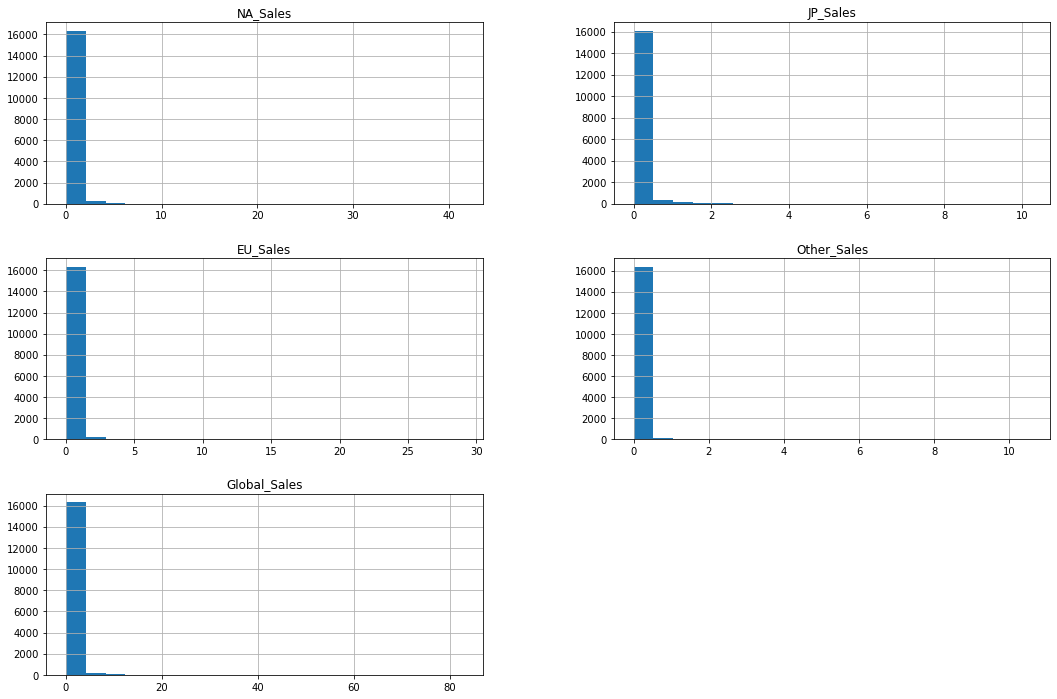

In [53]:
#1.1

vgdata=data[['NA_Sales','JP_Sales','EU_Sales','Other_Sales','Global_Sales']]

quantitative = [f for f in vgdata.columns if vgdata.dtypes[f] != 'object']
vgdata[quantitative].hist(bins=20, figsize=(18,12))
plt.show()


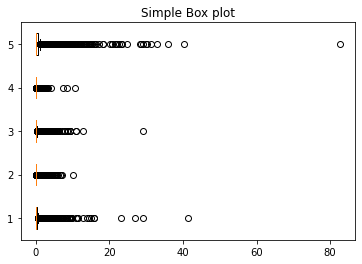

In [77]:
#1.2
fig, ax = plt.subplots()
ax.set_title('Simple Box plot')
ax.boxplot(vgdata[quantitative], vert=False)
plt.show()


In [27]:
#2
print('Average for NA',data['NA_Sales'].mean())
print('Average for EU',data['EU_Sales'].mean())
print('Average for JP',data['JP_Sales'].mean())
print('Average for Other',data['Other_Sales'].mean())


Average for NA 0.26466742981084057
Average for EU 0.1466520062658483
Average for JP 0.07778166044101108
Average for Other 0.048063019640913515


In [29]:
#3
print('Average for NA',data['NA_Sales'].std())
print('Average for EU',data['EU_Sales'].std())
print('Average for JP',data['JP_Sales'].std())
print('Average for Other',data['Other_Sales'].std())


Average for NA 0.8166830292990428
Average for EU 0.5053512312869366
Average for JP 0.30929064808213236
Average for Other 0.18858840291278392


In [111]:
#4
q1, q3= np.percentile((sorted(data['Global_Sales'])),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
data_without_outlier_GL=data[(data['Global_Sales']<lower_bound)|(data['Global_Sales']>upper_bound)]
len(data_without_outlier_GL)

1893

In [36]:
#5
print('Average for Global Sales',data['Global_Sales'].mean())
print('Median for Global Sales',data['Global_Sales'].median())
print('Difference of average and mean',data['Global_Sales'].mean()-data['Global_Sales'].median())

Average for Global Sales 0.53744065550074
Median for Global Sales 0.17
Difference of average and mean 0.36744065550074


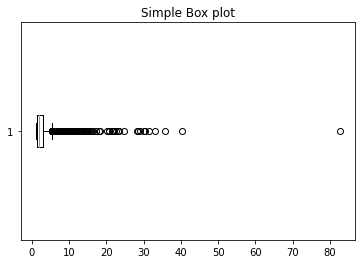

In [113]:
#6

fig, ax = plt.subplots()
ax.set_title('Simple Box plot')
ax.boxplot(data_without_outlier_GL['Global_Sales'], vert=False)
plt.show()

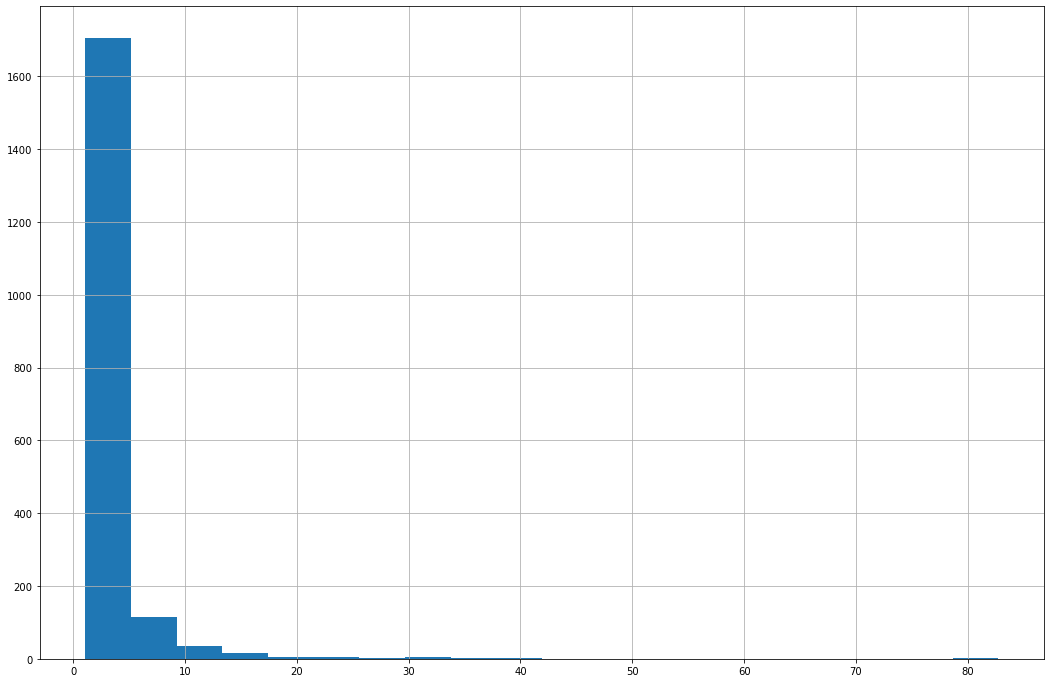

In [114]:
data_without_outlier_GL['Global_Sales'].hist(bins=20, figsize=(18,12))
plt.show()

In [115]:
#7
print('Average for Global Sales',data_without_outlier_GL['Global_Sales'].mean())
print('Median for Global Sales',data_without_outlier_GL['Global_Sales'].median())
print('Difference of average and mean',data_without_outlier_GL['Global_Sales'].mean()-data_without_outlier_GL['Global_Sales'].median())

Average for Global Sales 2.9142155309033306
Median for Global Sales 1.83
Difference of average and mean 1.0842155309033306


# 8. 

The values for mean and median were changed because we did actually remove outliers that were lying on specific range so they did also were impacting to the result of our calculation.

It is obvious that more number we have the smaller amount of mean we have , therefore when we eliminate numbers from dataset amount of mean and median will change as well.


## Q2 (20%)
Suppose that S is a random variable of the AITU graduates salaries in the first year of work, which is assumed to be normally distributed with the population mean µ = 500 thousand KZT and the population standard deviation σ = 80 thousand KZT. 

**Find the following probabilities:**
1. A graduate will have salary below 450 thousand KZT?
2. A graduate will have salary below the median salary?
3. A graduate will have salary above 660 thousand KZT?
4. A graduate will have salary between 400 and 600 thousand KZT?
5. In a sample of 25 graduates, what percentage of that students will have salary between 480 and 520 thousand KZT?

*Hint: Use SciPy's norm module and write all answers in one cell (using print(command)) for convenience.*

In [333]:
from scipy import stats
from scipy.stats import norm
#2.1
print(norm.cdf(x=450,loc=500,scale=80))
#2.2
print(norm.cdf(x=500,loc=500,scale=80))
#2.3
print(norm.sf(x=660,loc=500,scale=80))
#2.4
print(norm.cdf(x=600,loc=500,scale=80)-norm.cdf(x=400,loc=500,scale=80))
#2.5
print(norm(500, 80/5).cdf(520) - norm(500, 80/5).cdf(480))

0.26598552904870054
0.5
0.022750131948179195
0.7887004526662893
0.7887004526662893


## Q3 (20%)
We have a sample data about GPA for two groups of students (software engineers and big data analytics), which are presented in the lists below. Based on these data, do the following:
1. Construct 95% confidence interval for the population mean of software engineer students' GPA. State all the assumptions. 
2. Is there an evidence that average GPA for this group is larger than 2.9?
3. Construct 95% confidence interval for difference between two population means of GPA. State all the assumptions. 
4. Is there an evidence that one group has higher average GPA than another? If yes, which group performs better?
5. How your analysis would change in Task 1, if the sample size was 30? What if 20? Explain.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [134]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

In [135]:
gpa_bda = [3.16, 3.40, 3.61, 3.37, 3.24, 3.40, 3.00, 2.78, 3.22, 3.43, 3.32, 3.58,
           3.46, 3.45, 3.52, 3.13, 3.13, 3.81, 3.22, 3.65, 2.65, 3.51, 3.94, 3.86,
           3.30, 3.31, 3.45, 3.17, 3.57, 3.90, 3.54, 3.41, 3.39, 3.99, 3.24, 3.50,
           3.44, 3.55, 3.40, 3.17, 3.18, 3.67, 3.64, 3.29, 3.32, 3.19, 2.71, 3.79,
           3.12, 3.32, 3.17, 3.38, 3.76, 3.19, 3.47, 3.41, 3.01, 3.47, 2.72, 3.16]

**First of all calculated x_bar variable for average of se group.**

**Then we found standard deviation for sigma .**

**Then calculated standard error by division of sigma and square root of number of items.**

**Consequently , place them in norm.interval with 95% confidence interval.**

In [151]:
#1
import scipy.stats as st 
from scipy.stats import t
x_bar = np.mean(gpa_se)
sigma = np.std(gpa_se) # to compute sample std, we need df=1 
n = len(gpa_se)
std_error = sigma/np.sqrt(n) #sigma/np.sqrt(n)
se_interval=norm.interval(alpha=0.95 , loc=x_bar, scale=std_error)
print('Lower bound:', round(se_interval[0], 4))
print('Upper bound:', round(se_interval[1], 4))

Lower bound: 3.0814
Upper bound: 3.2429


**Based on the following number of average we can say that GPA for this group is larger than 2.9. So , this is the evidence .**

In [318]:
#2
np.mean(gpa_se)

3.162115384615385

In [334]:
#3
mean_diff=np.mean(gpa_bda)-np.mean(gpa_se)


std_se=np.std(gpa_se)
std_bda=np.std(gpa_bda)

std_error_diff = np.sqrt((std_se*std_se)/len(gpa_se) + (std_bda*std_bda)/len(gpa_bda))


ci_95_diff = norm.interval(alpha=0.95, loc=mean_diff, scale=std_error_diff)
print('Lower bound:', round(ci_95_diff[0], 5))
print('Upper bound:', round(ci_95_diff[1], 5))


Lower bound: 0.09854
Upper bound: 0.31523


**First of all calculated mean_diff variable for difference of average between two groups .**

**Then we found standard deviation for both of them .**

**Then calculated standard error difference with adding two values .**

**Consequently , place them in norm.interval with 95% confidence interval.**

# 4.

**By the following result below we can observe that gpa mean for bda students is more higher than se group , so bda group are doing well by the result.**

In [327]:
print(len(gpa_se))
print(len(gpa_bda))

print('Median for se group :',np.median(gpa_se))
print('Median for bda group :',np.median(gpa_bda))

print('Mean for se group :',np.mean(gpa_se))
print('Mean for bda group :',np.mean(gpa_bda))

52
60
Median for se group : 3.115
Median for bda group : 3.395
Mean for se group : 3.162115384615385
Mean for bda group : 3.3689999999999998


# 5

As you can see size of both two groups more than 30 students , so we did use normal distribution . But, in case when we have sample size smaller or equal to 30 , we could use T interval.

**T interval is good for situations where the sample size is small and population standard deviation is unknown. When the sample size comes to be very small (n≤30), the Z-interval for calculating confidence interval becomes less reliable estimate. And here the T-interval comes into place.**

However , if we had result equal to 20 our calcluations will be more clear regarding lower and upper bound and be more reliable as well.

In [331]:
gpa_cs = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63]


ci_95_t = t.interval(alpha=0.95, df=len(gpa_cs)-1, loc=np.mean(gpa_cs), scale=st.sem(gpa_cs))
print('Lower bound using T interval:', round(ci_95_t[0], 3))
print('Upper bound using T interval:', round(ci_95_t[1], 3))


x_bar = np.mean(gpa_cs)
sigma = np.std(gpa_cs) # to compute sample std, we need df=1 
n = len(gpa_cs)
std_error = sigma/np.sqrt(n) #sigma/np.sqrt(n)
cs_interval=norm.interval(alpha=0.95 , loc=x_bar, scale=std_error)
print('Lower bound using normal dist:', round(cs_interval[0], 4))
print('Upper bound using normal dist:', round(cs_interval[1], 4))

Lower bound using T interval: 3.046
Upper bound using T interval: 3.351
Lower bound using normal dist: 3.0591
Upper bound using normal dist: 3.3379


In this example for the sake of exploratory purposes I tried to show difference of result using normal distribution and T interval . So by the result we can see that sample that I created 'gpa_cs' has 20 items . So then, we can apply T interval here . As the result shows , it can be revealed that T interval method is lower than normal distribution , consequently this method more accurate in calculations .

**Therefore , those are the results of having sample less than 30.**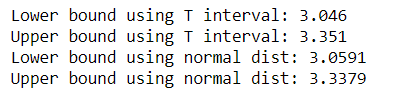

## Q4 (10%)
Consider the set of data below (my_list). Does it appear to approximately follow a normal distribution? Justify your answer.

*Hint: Check for the properties of the Normal distribution and for the graph of distribtuion.*

In [192]:
my_list = [113, 71, 89, 143, 140, 146, 122, 104, 134, 143, 110, 131, 125, 116, 
           164, 107, 113, 122, 119, 116, 98, 161, 128, 152, 116, 83, 86, 155,
           128, 122, 95, 122, 131, 134, 107, 113, 101, 92, 134, 140]

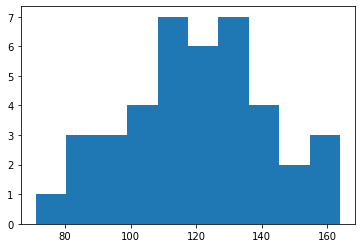

In [298]:

mu, sigma = np.mean(my_list), np.std(my_list)
plt.hist(x=my_list);

The normal distribution chart is characterized by two parameters: 

1)The average value, which represents the maximum value of the chart, and the chart is always symmetrical. 

2)And the standard deviation, which determines the amount of change beyond the mean. Smaller standard deviations (compared to the mean) appear steeper, while larger standard deviations (compared to the mean) appear flat.

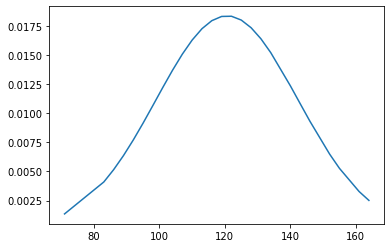

Mean is equal to  120.65
Mode is equal to  122
Median is equal to  122.0


In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
    

my_list1=sorted(my_list)
# Calculating mean and standard 
# deviation
mean = statistics.mean(my_list1)
sd = statistics.stdev(my_list1)
median = statistics.median(my_list1)
mode= statistics.mode(my_list1)
plt.plot(my_list1, norm.pdf(my_list1, mean, sd))
plt.show()

print('Mean is equal to ' ,mean)
print('Mode is equal to ' ,mode)
print('Median is equal to ' ,median)

# Conclusion

### By observation that I did regarding this data and its statistical values , we can conclude that it's not normally distributed. Why ?

Because , one of the requiremenets to be normally distributed values like mode , median and mean should be equal to each other . But we can say that they are not perfectly equal to each other .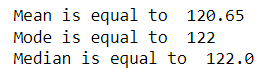

1)Yeah , our data is bell-shaped but not every bell-shaped curve can be normal distribution.


2)We have slight difference between mean and mode and data are not perfectly symmetric (etc); it's the fact that populations are themselves not perfectly normal.



**So , by my opinion it is not normal distribution . Even If I get wrong , I tried prove my point of view and I hope it will be correct.**

## Q5 (10%)
Generate synthetic data (numpy.random.normal) with mean = 70, std = 12 and size = 1000 (round it to nearest integer). 

__Tasks to do:__
1. Plot histogram
2. What is the mean, median and mode
3. Build function to calculate standard deviation using standard Python functionality
4. Calculate std. using your function and compare it with numpy function

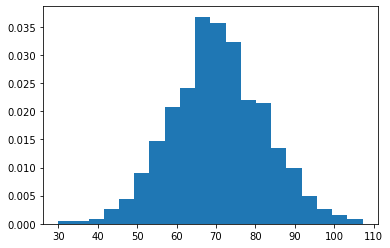

In [312]:
#1
n = 1000
mu, sigma = 70, 12
s = np.random.normal(mu, sigma, n)
plt.hist(x=s, bins=20, density=True);



In [313]:
#2 
mean_of_s = statistics.mean(s)
median_of_s = statistics.median(s)
mode_of_s= statistics.mode(s)

print('Mean is equal to ' ,mean_of_s)
print('Mode is equal to ' ,mode_of_s)
print('Median is equal to ' ,median_of_s)

Mean is equal to  70.50909120434198
Mode is equal to  63.26823184824257
Median is equal to  70.27535778098151


In [256]:
#3
import math

def func(s):
    mean = sum(s) / len(s)   # mean
    var  = sum(pow(x-mean,2) for x in s) / len(s)  # variance
    std  = math.sqrt(var)  # standard deviation
    return std

func(s)


11.684398543067081

In [314]:
#4
print('Standard deviation using numpy library' , np.std(s))
print('Standard deviation using my own method' ,func(s))

Standard deviation using numpy library 11.846176670465576
Standard deviation using my own method 11.84617667046558


## Q6 (10%)
Prove the following expression:

$$Var(X) = E((X-\mu)^2) = E(X^2) - (E(X))^2$$



*Hint: For proof write it down in markdown cell below using LaTex.*



$$ Var(X)=E[(X−μ)2] $$ 

$$ Var(X)=E[(X−E[X])2] $$

$$ Var(X)=E[(X−E[X])(X−E[X])] $$

$$ Var(X)=E[X2−2XE[X]+(E[X])2] $$

$$ Var(X)=E[X2]−2E[XE[X]]+E[(E[X])2] $$

$$ Var(X)=E[X2]−2E[E[X]E[X]]+E[(E[X])2] $$

$$ Var(X)=E[X2]−2(E[X])2+(E[X])2 $$

$$ Var(X)=E[X2]−(E[X])2 $$



## Q7 (10%)
For each of the cases of confidence intervals in the lecture (3 simple and 5 complicated) find/create an example and mention corresponding assumptions such as sample size or original distribution or variance. Also, note that you should not use examples that was presented during the lecture. 

*Note: no need to create a problem, just a situation which will correspond to the confidence interval case.*

There are range of hypothesis tests exists. Below you can see some of them that we will cover: 
1. Hypothesis test for a single mean (σ known)
2. Hypothesis test for a single mean (σ unknown)
3. Hypothesis test for a single proportion


More advanced cases: 

4. Difference between two population proportions
5. Difference between two population means: Unpaired samples – variances known
6. Difference between two population means: Unpaired samples – variances unknown and unequal
7. Difference between two population means: Unpaired samples – variances unknown and equal
8. Difference between two population means: Paired (dependent) samples

1)

**Hypothesis test for a single mean (σ known)**

Let's imagine grocery company want to test their new method , and their release it brand new way for them , so they do not know will it affect to other products by its consistency(flavour,taste) or it will still be the same even after insisting new approach of production(at first they do 300) .

H0: μafter = μbefore (the mean number of products is the same before and after using the new method)


HA: μafter ≠ μbefore (the mean number of defective products is different before and after using the new method)

2)

**Hypothesis test for a single mean (σ unknown)**


Some person bought ready business(sneaker's shop) and want to know what are the estimations regarding average price of sneakers sale , so random sample of 20 sneakers brands have following prices :

sneakers = [44, 36.00, 43.50, 29.50, 44.50, 47.50, 45.50, 53.00, 40.00, 38.00, 33.00, 54.50,44, 36.00, 43.50, 29.50, 44.50, 47.50, 45.50, 53.00, 40.00, 38.00,]

3)

We can use **single proportion** if we want to make decision regarding business(refer to 2 task) . For example , let's imagine we did poll in our instagram , what our customers want more Adidas sneakers or Nike sneakers . So , let's say 20 out of 30 responded nike , so p=20/30=0.6 . We can do t interval around this number.

4) 

**Difference between two population proportions** 

Males and females were asked about what they would do if they received a $100 bill by mail, addressed to their neighbor, but wrongly delivered to them. Would they return it to their neighbor? Of the 69 males sampled, 52 said "yes" and of the 131 females sampled, 120 said "yes."

Does the data indicate that the proportions that said "yes" are different for male and female? How do we begin to answer this question?

If the proportion of males who said “yes, they would return it” is denoted as  and the proportion of females who said “yes, they would return it” is denoted as , then the following equations indicate that  is equal to .


5)

**Difference between two population means: Unpaired samples – variances known**

Two colleges have to determine which one graduates students with more math classes. College A samples 21 graduates. Their average is four math classes with a standard deviation of 1.5 math classes. College B samples 12 graduates. Their average is 3.5 math classes with a standard deviation of one math class. The community group believes that a student who graduates from college A has taken more math classes, on the average. Both populations have a normal distribution. 


6)

**Difference between two population means: Unpaired samples – variances unknown and unequal** in medicine or observations.

We want to test one drug on our plant or patient . So , efficiency of this drug we can expect after 30 days of using drug and previous result . Also , with number of days , we're given data how many patients were tested on this drug along with their standard deviation.


7)

**Difference between two population means: Unpaired samples – variances unknown and equal**

We have two lines of computers. We want to know their efficiency and test if their speed of operations are same or no in order to choose better for ourselves.

$H_0 : \mu_1 = \mu_2$ vs. $H_0 : \mu_1 \neq \mu_2$

8)

**Difference between two population means: Paired (dependent) samples**

Football coach of Chelsea football club wants to test first 11 players of the squad if the new types of trainings will give better result in their speed . So , he did wrote up speed list of 11 players after and before training.

we define  𝜇𝑑=𝜇1−𝜇2  since we hope that trainings will be more efficient than it was before.